In [37]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from warnings import filterwarnings
filterwarnings("ignore")


In [38]:
data = pd.read_csv("C:/Users/gamze/OneDrive/Masaüstü/magic04.csv", 
names=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class'])

In [39]:
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [40]:
data.shape

(19020, 11)

In [41]:
features = data.iloc[:,:10].values
labels = data.iloc[:,10]
mapping = {'h': 0, 'g': 1}
labels = labels.replace(mapping)
labels = labels.values.flatten()

In [42]:
count = np.bincount(labels)
perc = count / len(labels)
print("Percentage of 0 (hadron)=",perc[0]*100,"%")
print("Percentage of 1 (gamma) =",perc[1]*100,"%")

Percentage of 0 (hadron)= 35.16298633017876 %
Percentage of 1 (gamma) = 64.83701366982125 %


g    12332
h     6688
Name: class, dtype: int64


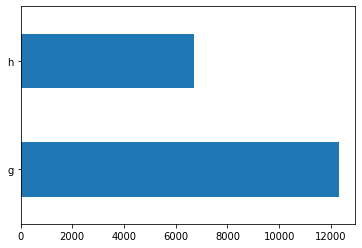

In [43]:
print(data["class"].value_counts())
data["class"].value_counts().plot.barh()

In [44]:
x_train, x_test, y_train, y_test = train_test_split(features,labels, test_size = 0.2,shuffle=True,stratify=labels,
                                                    random_state=42 )

In [45]:
scaler= StandardScaler()
scaler.fit(x_train)
x_train= scaler.transform(x_train)
scaler.fit(x_test)
x_test= scaler.transform(x_test)

In [46]:
#k-nearest neigbour classifier
knn=KNeighborsClassifier()
knn_model=knn.fit(x_train,y_train)
knn_model


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [47]:
y_pred=knn_model.predict(x_test)
accuracy_score(y_test,y_pred)
print("k-nearest neigbour accuracy: ",accuracy_score(y_test, y_pred))

k-nearest neigbour accuracy:  0.832018927444795


In [48]:
#k-nearest neigbour classifier find the best parameters

knn_params = {'n_neighbors': np.arange(1,20),
              'weights': ['uniform','distance'],
              'metric':['euclidean','manhattan']
              }
knn=KNeighborsClassifier()
gs=GridSearchCV(KNeighborsClassifier(), knn_params, verbose=1, cv=10, n_jobs=-1)
gs_results = gs.fit(x_train,y_train)

print("k-nearest neighbour best parameters: ",gs_results.best_params_)

Fitting 10 folds for each of 76 candidates, totalling 760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   46.6s


k-nearest neighbour best parameters:  {'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 760 out of 760 | elapsed:  1.7min finished


In [49]:
#k-nearest - model tuning
knn_tuned=KNeighborsClassifier(n_neighbors=14, metric='euclidean', weights='distance')
knn_tuned.fit(x_train,y_train)
y_pred=knn_tuned.predict(x_test)
confusionmatrix = confusion_matrix(y_test, y_pred)
print("Knn confusion matrix:")
print(confusionmatrix)
dogruluk= accuracy_score(y_test,y_pred)
print("Knn tuned accuracy: ", dogruluk)
print("Knn classification report:")
print(classification_report(y_test,y_pred))

Knn confusion matrix:
[[ 848  490]
 [ 101 2365]]
Knn tuned accuracy:  0.8446372239747634
Knn classification report:
              precision    recall  f1-score   support

           0       0.89      0.63      0.74      1338
           1       0.83      0.96      0.89      2466

    accuracy                           0.84      3804
   macro avg       0.86      0.80      0.82      3804
weighted avg       0.85      0.84      0.84      3804



In [57]:
#Multilayer perceptron classifier
mlp= MLPClassifier()
mlp_model= mlp.fit(x_train,y_train)
#print(mlp_model.coefs_)
mlp_model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [82]:
y_pred= mlp_model.predict(x_test)
mlp_accuracy= accuracy_score(y_test,y_pred)
print("Multilayer perceptron accuracy:",mlp_accuracy)

Multilayer perceptron accuracy: 0.8772344900105152


In [59]:
#Multilayer perceptron classifier find the best parameters
mlp_params= {"alpha": [1,5,0.1,0.01,0.03,0.005,0.0001],
             "hidden_layer_sizes": [(10,10),(100,100,100),(100,100),(3,5)]}

mlp= MLPClassifier(solver="lbfgs",activation="logistic")
gs= GridSearchCV(mlp,
                 mlp_params,
                 cv=10,
                 n_jobs=-1,
                 verbose=2)
mlp_cv_model= gs.fit(x_train,y_train)
print(mlp_cv_model)
print(mlp_cv_model.best_params_) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed: 41.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='logistic', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='lbfgs', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_g

In [75]:
#Mlp - model tuning
mlp= MLPClassifier(solver='lbfgs',
                   activation='logistic',
                   alpha=0.03,
                   hidden_layer_sizes=(10,10))

mlp_tuned= mlp.fit(x_train,y_train)
predictions= mlp_tuned.predict(x_test)
dogruluk= accuracy_score(y_test,predictions)
print("Mlp tuned accuracy: ", dogruluk)
print("Mlp confusion matrix:")
print(confusion_matrix(y_test,predictions))
print("Mlp classification report:")
print(classification_report(y_test,predictions))

Mlp tuned accuracy:  0.8811777076761304
Mlp confusion matrix:
[[1030  308]
 [ 144 2322]]
Mlp classification report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1338
           1       0.88      0.94      0.91      2466

    accuracy                           0.88      3804
   macro avg       0.88      0.86      0.87      3804
weighted avg       0.88      0.88      0.88      3804



In [81]:
Siniflandirici=[knn_tuned,
                mlp_tuned]


for model in Siniflandirici:
    isimler=model.__class__.__name__
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    print(isimler +":")
    print("Accuracy:{:.4%}".format(acc))

KNeighborsClassifier:
Accuracy:84.4637%
MLPClassifier:
Accuracy:88.1178%


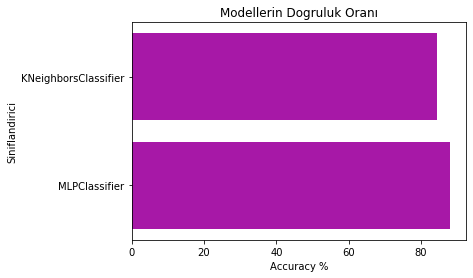

In [84]:

sonuc=[]
sonuclar=pd.DataFrame(columns=["Siniflandirici","Accuracy"])

for model in Siniflandirici:
    isimler=model.__class__.__name__
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    sonuc=pd.DataFrame([[isimler,acc*100]],columns=["Siniflandirici","Accuracy"])
    sonuclar=sonuclar.append(sonuc)
    
    
    sns.barplot(x="Accuracy",y="Siniflandirici",data=sonuclar,color="m")
    plt.xlabel("Accuracy %")
    plt.title("Modellerin Dogruluk Oranı");

In [112]:
#MLP-katmanlı
import keras
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10,)) 
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
history = classifier.fit(x_train, y_train, validation_split=0.20, batch_size = 10, epochs = 15)

#Accuracy
loss, accuracy = classifier.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = classifier.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/15
1218/1218 [==============================] - 2s 1ms/step - loss: 0.1237 - accuracy: 0.8331 - val_loss: 0.1163 - val_accuracy: 0.8486
Epoch 2/15
1218/1218 [==============================] - 2s 1ms/step - loss: 0.1053 - accuracy: 0.8586 - val_loss: 0.1127 - val_accuracy: 0.8472
Epoch 3/15
1218/1218 [==============================] - 2s 1ms/step - loss: 0.1006 - accuracy: 0.8640 - val_loss: 0.1104 - val_accuracy: 0.8495
Epoch 4/15
1218/1218 [==============================] - 2s 1ms/step - loss: 0.0984 - accuracy: 0.8685 - val_loss: 0.1090 - val_accuracy: 0.8482
Epoch 5/15
1218/1218 [==============================] - 2s 1ms/step - loss: 0.0974 - accuracy: 0.8693 - val_loss: 0.1061 - val_accuracy: 0.8597
Epoch 6/15
1218/1218 [==============================] - 2s 1ms/step - loss: 0.0963 - accuracy: 0.8711 - val_loss: 0.1054 - val_accuracy: 0.8532
Epoch 7/15
1218/1218 [==============================] - 2s 1ms/step - loss: 0.0955 - accuracy: 0.8718 - val_loss: 0.1046 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


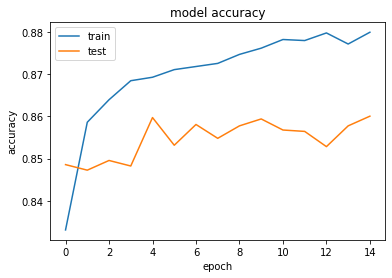

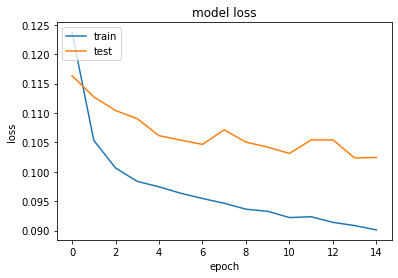

In [113]:


#Grafilk çizdirilir
import matplotlib.pyplot as plt 
import numpy as np 
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

